In [35]:
import pandas as pd
import numpy as np
import os
df=pd.read_csv('/home/ishaan/Machine-Learning/datasets/synth.tr.csv')
del df['Unnamed: 0']
#add bias term to dataset
m=df.shape[0]
df['bias'] = pd.Series(np.ones(m), index=df.index)
cols = list(df)
cols.insert(0, cols.pop(cols.index('bias')))
df = df.ix[:, cols]
df = df.sample(frac=1).reset_index(drop=True)
print df.head(10)

   bias        xs        ys  yc
0   1.0 -0.121725  0.841129   1
1   1.0  0.076348  0.562222   1
2   1.0  0.179654  0.451754   0
3   1.0  0.077370  0.321833   0
4   1.0 -0.366535  0.648310   1
5   1.0  0.383235  0.756017   1
6   1.0 -0.252046  0.673583   1
7   1.0  0.243215  0.514883   0
8   1.0  0.435744  0.446898   1
9   1.0  0.614204  0.750390   1


In [36]:
#forward propogation
#2 hidden layers assumed
#with two elements in every layer except final output layer
#bias term will be added in every layer except final output layer
#layer 1-2
theta1=np.random.rand(2,3)
x1=df.ix[:,0:3]
a1=x1.transpose()
z2=theta1.dot(a1)
gz2=1.0/(1+np.exp(-1*z2))



In [3]:
#layer 2-3
bias = [1 for i in range(1,251)]
a2=np.vstack([bias,gz2])
theta2=np.random.rand(2,3)
z3=theta2.dot(a2)
gz3=1.0/(1+np.exp(-1*z3))
print gz3
#layer 3-4
bias = [1 for i in range(1,251)]
a3=np.vstack([bias,gz2])
theta3=np.random.rand(1,3)
z4=theta3.dot(a3)
gz4=1.0/(1+np.exp(-1*z4))
print gz4


[[ 0.84065194  0.84944753  0.85242814  0.8465896   0.85054414  0.85529646
   0.85871593  0.8615403   0.85510462  0.86558954  0.86896951  0.82871429
   0.8268874   0.85382842  0.86322676  0.86087417  0.82923963  0.84922725
   0.86115422  0.85154072  0.84198382  0.84359108  0.8526388   0.83958029
   0.8636921   0.82427302  0.82587045  0.84053465  0.85702907  0.84978902
   0.85078271  0.84684771  0.84844657  0.82377947  0.85203326  0.85533617
   0.83595285  0.8590601   0.86046472  0.85609529  0.82449205  0.84822994
   0.85304369  0.8460286   0.85476692  0.85159588  0.85346869  0.84374237
   0.86111468  0.84533531  0.83502764  0.85924596  0.82812385  0.84329948
   0.82664391  0.86544505  0.86136072  0.84905668  0.85374555  0.85539287
   0.86546695  0.82978411  0.86300707  0.83231922  0.84618113  0.8604646
   0.85707364  0.85453217  0.85797738  0.86703167  0.86312913  0.8475198
   0.86824998  0.81958667  0.8356164   0.83269367  0.83256273  0.85585779
   0.82706115  0.83154799  0.85623013  0

In [37]:
#backward propogation
#layer 3-4
error4=np.mat(gz4[0,:]-df.ix[:,3])
#layer 2-3
gdashz3=a3*(1-a3)
error3=np.multiply(theta3.transpose().dot(error4),gdashz3)
#layer 1-2
gdashz2=a2*(1-a2)
error2=np.multiply(np.vstack([[0 for i in range(1,251)],theta2.dot(error3)]),gdashz2)

In [38]:
#updating thetas
delta3 = [[0 for i in range(1,4)]]
delta3=delta3+error4.dot(a3.transpose())
D3=delta3/250
delta2 = [[0 for i in range(1,4)]]
delta2=delta2+error3.dot(a2.transpose())
D2=delta2/250
delta1 = [[0 for i in range(1,4)]]
delta1=delta1+error2.dot(a1.transpose())
D1=delta1/250

In [39]:
D1=D1[1:,:]
D2=D2[1:,:]
D3=np.asarray(D3)
D2=np.asarray(D2)
D1=np.asarray(D1)
print D1
print D2

[[ 0.01078659 -0.00319658  0.00248066]
 [ 0.01552157 -0.00459542  0.00360067]]
[[ 0.05211988  0.03477366  0.02728705]
 [ 0.01948803  0.01306431  0.01027835]]


In [40]:
#test set error
dat=pd.read_csv('/home/ishaan/Machine-Learning/datasets/synth.te.csv')
del dat['Unnamed: 0']
#add bias term to dataset
m=dat.shape[0]
dat['bias'] = pd.Series(np.ones(m), index=dat.index)
cols = list(dat)
cols.insert(0, cols.pop(cols.index('bias')))
dat = dat.ix[:, cols]
dat = dat.sample(frac=1).reset_index(drop=True)
dat=dat.tail(250)


In [9]:
tx1=dat.ix[:,0:3]
ta1=tx1.transpose()
tz2=D1.dot(ta1)
tgz2=1.0/(1+np.exp(-1*tz2))
#layer 2-3
tbias = [1 for i in range(1,251)]
ta2=np.vstack([tbias,tgz2])
tz3=D2.dot(ta2)
tgz3=1.0/(1+np.exp(-1*tz3))
#layer 3-4
tbias = [1 for i in range(1,251)]
ta3=np.vstack([tbias,tgz2])
tz4=D3.dot(ta3)
tgz4=1.0/(1+np.exp(-1*tz4))
print tgz4

[[ 0.62450036  0.624472    0.62435344  0.62439192  0.62444025  0.62444887
   0.62442791  0.62438882  0.62437671  0.62442603  0.62436252  0.62443233
   0.62435872  0.62447068  0.62435585  0.62436569  0.62438701  0.62444608
   0.62443198  0.62448197  0.62435231  0.62445409  0.62447322  0.62436733
   0.62434463  0.62436404  0.62444734  0.624468    0.62445502  0.62440251
   0.62443352  0.62435682  0.62441289  0.6244441   0.6244334   0.62448862
   0.62447058  0.62433308  0.6244217   0.62444131  0.62435271  0.62444231
   0.62446221  0.62439508  0.62445298  0.62439031  0.62440752  0.62434289
   0.62444625  0.62444818  0.62435211  0.62446465  0.62446803  0.62434576
   0.62442775  0.62440162  0.62434701  0.6244773   0.62440562  0.62435017
   0.62447068  0.62445494  0.62446975  0.6244483   0.62444284  0.62445255
   0.62446737  0.62438175  0.62437303  0.62445895  0.6243816   0.62446989
   0.62435666  0.6243673   0.62442841  0.62447003  0.62447126  0.62445234
   0.62444142  0.62441624  0.62436173 

In [41]:
prediction=np.reshape(tgz4, (250, 1)) 

In [42]:
import scipy.sparse as sparse
dat['prediction'] = prediction
print dat

     bias        xs        ys  yc  prediction
750   1.0  0.317894  0.110579   0    0.624500
751   1.0  0.618168  0.327309   0    0.624472
752   1.0 -0.306930  0.574183   1    0.624353
753   1.0  0.270601  0.260199   0    0.624392
754   1.0  0.418146  0.145522   0    0.624440
755   1.0 -0.921420 -0.069844   0    0.624449
756   1.0  0.427675  0.962589   1    0.624428
757   1.0 -0.060506  0.772167   1    0.624389
758   1.0 -0.028566  0.486501   1    0.624377
759   1.0  0.274956  0.622947   1    0.624426
760   1.0  0.748855  0.246813   0    0.624363
761   1.0 -0.851073  0.474956   0    0.624432
762   1.0 -1.011976  0.344692   0    0.624359
763   1.0 -0.650766  0.412201   0    0.624471
764   1.0  0.204728  0.915150   1    0.624356
765   1.0 -1.055052  0.517833   0    0.624366
766   1.0 -0.263821  0.565778   1    0.624387
767   1.0  0.346902  0.776639   1    0.624446
768   1.0  0.340884  0.582415   1    0.624432
769   1.0 -0.871901  0.191787   0    0.624482
770   1.0 -0.325250  0.791106   1 

In [43]:
((len(dat[(dat['prediction']>=0.5) & (dat['yc']==1)])+len(dat[(dat['prediction']<0.5) & (dat['yc']==0)]))/250.0)*100

52.0

In [44]:
print "accuracy of 52% on test set"

accuracy of 52% on test set


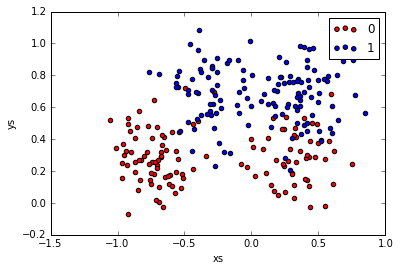

In [45]:
#plot test set
import matplotlib.pyplot as plt
from random import *
%matplotlib inline
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = dat.groupby('yc')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='xs', y='ys', label=key, color=colors[key])
plt.show()

In [46]:
print "certainly non linear decision boundary"

certainly non linear decision boundary


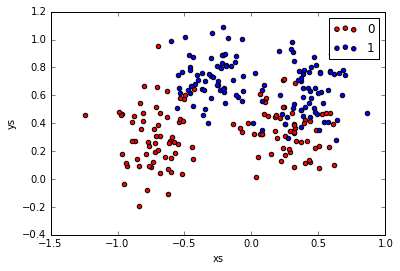

In [47]:
#plot train set
import matplotlib.pyplot as plt
from random import *
%matplotlib inline
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = df.groupby('yc')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='xs', y='ys', label=key, color=colors[key])
plt.show()